# Описание задачи

Дан датасет представляющий из себя 18 тысяч описаний вакансий, из которых около 800 - поддельные.Данные состоят из текстовой информации и метаинформации о вакансиях.

По вакансии с 17 признаками необходимо опредить, к какому классу принадлежит вакансия: настоящая либо фальшивая.


# Чтение данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt

import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Визуализирование данных и вычисление основных характеристик. Интерпретация.

In [2]:
df = pd.read_csv("fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
df.shape

(17880, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

Признаки:
1. job_id - уникальный идентификатор вакансии

2. title - Заголовок объявления о вакансии.

3. location - Географическое расположение вакансии.

4. department - Корпоративный отдел (например, продажи).

5. salary_range - Ориентировочный диапазон заработной платы (например, от 50 000 до 60 000 долларов США).

6. company_profile - Краткое описание компании.

7. description - Подробное описание вакансии.

8. requirements - требования к сотруднику.

9. benefits - льготы от работодателя.

10. telecommuting - удаленная работа (true - да, false - нет).

11. has_company_logo - Наличие логотипа компании (true - да, false - нет).

12. has_questions - Проверочные вопросы при устройстве (true - да, false - нет).

13. employment_type - Полный, Неполный рабочий день, Контракт и т. д.

14. required_experience - Исполнительный, Начальный уровень, Стажер и т. д.

15. required_education - Докторантура, степень магистра, бакалавр и т. д.

16. industry - Автомобильная промышленность, информационные технологии, здравоохранение, недвижимость и т. д.

17. functions - Консультации, инжиниринг, исследования, продажи и т. д.

18. fraudulent - атрибут классификации (0 - оригинальная вакансия, 1 - фальшивая вакансия)

In [5]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


# Обработка пропущенных значений

In [6]:
df=df.drop(['location','job_id','department','salary_range','description',
            'title','company_profile','benefits','requirements'],axis=1)


In [7]:
df.isnull().sum()

telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

Из-за обилия нулевых значений в некоторых категориальных признаках, удалить строки или столбцы нельзя. Поэтому лучше заполнить их пустыми значениями.


In [8]:
df.fillna(" ",inplace = True)
df.isnull().sum()

telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

#  Обработка категориальных признаков

In [9]:
df['employment_type'] = df['employment_type'].astype('category')
df['required_experience'] = df['required_experience'].astype('category')
df['required_education'] = df['required_education'].astype('category')
df['industry'] = df['industry'].astype('category')
df['function'] = df['function'].astype('category')
df.describe(include=["category"])

,employment_type,required_experience,required_education,industry,function
count,17880,17880,17880,17880,17880
unique,6,8,14,132,38
top,Full-time,,,,
freq,11620,7050,8105,4903,6455


In [10]:
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,,,Marketing,0
1,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,0,1,0,,,,,,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...
17875,0,1,1,Full-time,Mid-Senior level,,Computer Software,Sales,0
17876,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,0,0,0,Full-time,,,,,0
17878,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


Теперь для дальнейших вычислений переведем категориальные признаки в численные.

In [11]:
categorical=df.select_dtypes('category').columns.tolist()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical:
    df[i]=le.fit_transform(df[i])


# Проведение нормализации


Проводим нормализацию данных:




In [12]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
df.describe()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.333758,0.353955,0.173589,0.300052,0.299687,0.048434
std,0.202631,0.403492,0.499945,0.206340,0.373098,0.229451,0.268882,0.302861,0.214688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.400000,0.142857,0.153846,0.244275,0.216216,0.000000
75%,0.000000,1.000000,1.000000,0.400000,0.857143,0.153846,0.473282,0.513514,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Разбиение данных на обучающую и тестовую выборки

Разобъем данные на обучающую и тестовую выборку в пропорции 60:40

In [13]:
X=df.drop(['fraudulent'],axis=1)
y=df['fraudulent']

from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler(sampling_strategy='minority', random_state=365)
X_over,y_over=rs.fit_resample(X,y)
X_over.describe()
y_over.describe()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_over,y_over,random_state=1,test_size=0.4)
N_trane, _ = X_train.shape
N_test, _ = X_test.shape
N_trane, N_test

(20416, 13612)

# Запуск классификатора ближайших соседей

Для предсказания истинности вакансии воспользуемся методом k ближайших соседей.

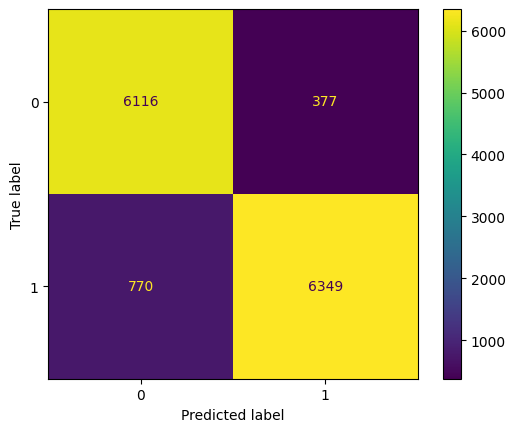

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
disp=ConfusionMatrixDisplay(confusion_matrix(y_test_pred, y_test))
disp.plot()

Для повышения точности модели имеет смысл рассмотреть иное количество k(количество соседей) в моделе.


# Вычисление ошибки на обучающей и тестовой выборках. Выбор оптимального значения гиперпараметра (к-ва ближайших соседей)

In [15]:
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('k = {}, accuracy = {}'.format(k, accuracy_score(y_pred, y_test)))

k = 1, accuracy = 0.92234792829856
k = 2, accuracy = 0.8649720834557744
k = 3, accuracy = 0.9208051719071407
k = 4, accuracy = 0.8660005877167205
k = 5, accuracy = 0.9157361151924772
k = 6, accuracy = 0.9154422568322069
k = 7, accuracy = 0.9107405230678813
k = 8, accuracy = 0.9100058771672054
k = 9, accuracy = 0.9043491037320012
k = 10, accuracy = 0.9032471348809874
k = 11, accuracy = 0.8971495739053776
k = 12, accuracy = 0.8989127240669997
k = 13, accuracy = 0.8914928004701734
k = 14, accuracy = 0.8920805171907141
k = 15, accuracy = 0.8880399647369968
k = 16, accuracy = 0.8881868939171319
k = 17, accuracy = 0.8837790185130767
k = 18, accuracy = 0.8826770496620628
k = 19, accuracy = 0.8778283867176021


Наилучшая точность достигается при k=1:

In [16]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != y_train_pred)

print("err_train: ", err_train)
print("err_test: ", err_test)

print("acc_train: ", 1-err_train)
print("acc_test: ",  1-err_test)

err_train:  0.06651645768025079
err_test:  0.07765207170143991
acc_train:  0.9334835423197492
acc_test:  0.92234792829856


Ошибка на тренировочной выборке при этом составила 6,7%, а на тестовой - 7,8%.

## Обучение нейронной сети
В качестве альтернативного метода обучим на данных полносвязную (неглубокую) нейронную сеть

## Обучаем классификатор

In [17]:
mlp_model = MLPClassifier(hidden_layer_sizes = (10,),
                          solver = 'lbfgs',
                          activation = 'logistic',
                          random_state = 40,
                          max_iter=10000)

In [18]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: total: 33.5 s
Wall time: 33.2 s


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=10000,
              random_state=40, solver='lbfgs')

In [19]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.8501175548589341

In [20]:
accuracy_score(y_test, y_test_pred)

0.8453570379077284

## Подбор гиперпараметров

Найдем оптимальное значение параметра регуляризации alpha

In [37]:
alpha_arr = np.logspace(-5, 2, 30)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10,),
                              solver = 'lbfgs',
                              activation = 'logistic',
                              max_iter=10000,
                              random_state = 40)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

[]

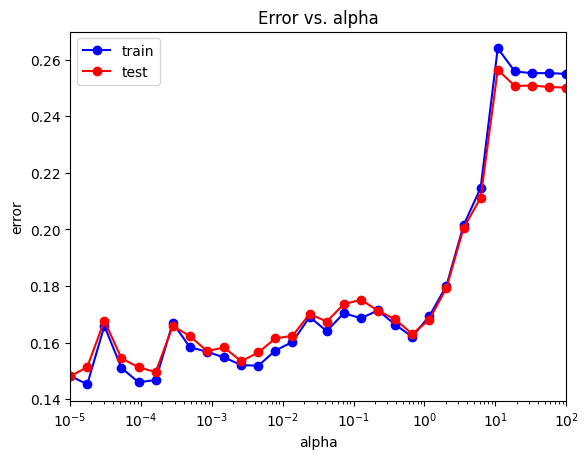

In [41]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
plt.plot()

[]

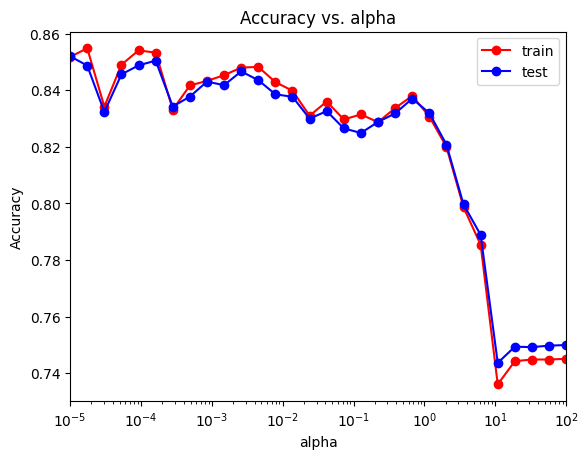

In [40]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

Наибольшая точность при небольших значениях параметра

In [24]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальное значение ошибки:',min_train_err, min_test_err)

Минимальное значение ошибки: 0.14522923197492163 0.14803114898618866


In [25]:
alpha_opt = alpha_arr[test_err == min_test_err][0]
print('Оптимальное значение alpha:',alpha_opt)

Оптимальное значение alpha: 1e-05


## Подбор количества нейронов

Подберем оптимальное количество нейронов в нейронной сети при оптимальном значении alpha

In [ ]:
neuron_arr = (np.linspace(1, 50, 15)).astype(int)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neuron in neuron_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,),
                              solver = 'lbfgs',
                              activation = 'logistic',
                              max_iter=10000,
                              random_state = 40)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

[]

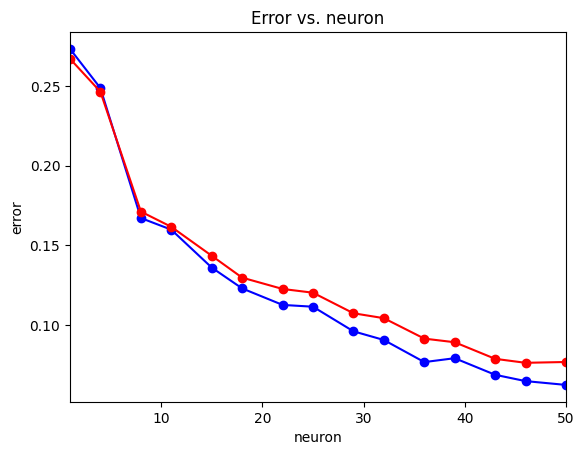

In [27]:
plt.plot(neuron_arr, train_err, 'b-o', label = 'train')
plt.plot(neuron_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Error vs. neuron')
plt.xlabel('neuron')
plt.ylabel('error')
plt.plot()

[]

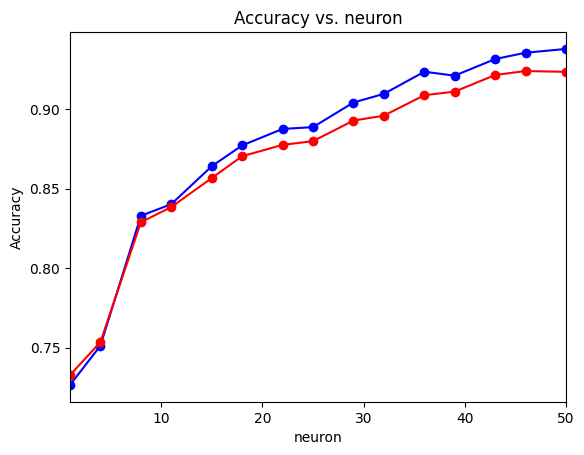

In [28]:
plt.plot(neuron_arr, train_acc, 'b-o', label = 'train')
plt.plot(neuron_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Accuracy vs. neuron')
plt.xlabel('neuron')
plt.ylabel('Accuracy')
plt.plot()

С ростом числа нейронов наблюдается увеличение точности

In [29]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальное значение ошибки:',min_train_err, min_test_err)

Минимальное значение ошибки: 0.06220611285266458 0.07610931531002058


In [30]:
neuron_opt = neuron_arr[test_err == min_test_err][0]
print('Оптимальное количество нейронов:',neuron_opt)

Оптимальное количество нейронов: 46


## Классификатор при найденных параметрах (alpha и кол-во нейронов)

In [34]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 40, max_iter=20000)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Итоговая точность:')
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

Итоговая точность:
0.9355897335423198
0.9244049368204525


## Матрица рассогласования:

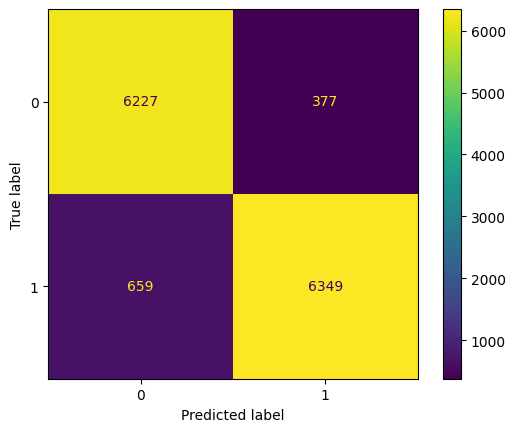

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
disp=ConfusionMatrixDisplay(confusion_matrix(y_test_pred, y_test))
disp.plot()

## Выводы:


*   В однослойной нейронной сети с относительно небольшим
кол-ом нейронов(46) и опт. параметром  удалось добиться высокой точности (0.935 и 0.924). Данный результат не много лучше, чем в KNN (0.933 и 0.922). При этом сутя по рассмотренным графикам точности относительно числа нейронов, результат может улучшится, но обучение подобной нейронной сети будет занимать существенно большее время.
*   Ни недообучения, ни переобучения не наблюдалось ни на одном из этапов подбора оптимальных параметров.



# Замечание.Коррелированные переменные


<Axes: >

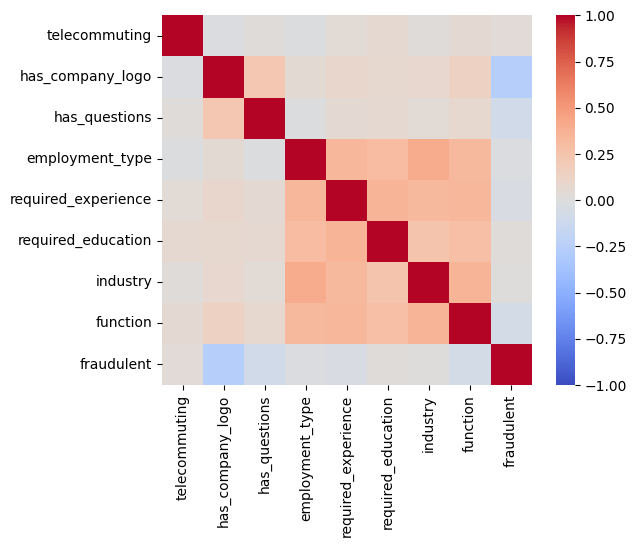

In [33]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix , square=True, vmin = -1, vmax = 1,cmap="coolwarm")

Строгой или значимой корреляции нет.